In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

In [2]:
#Importing the training dataset
dataset = pd.read_csv('Dataset_Train.csv')

In [3]:
'''K NEAREST NEIGHBOR'''

'K NEAREST NEIGHBOR'

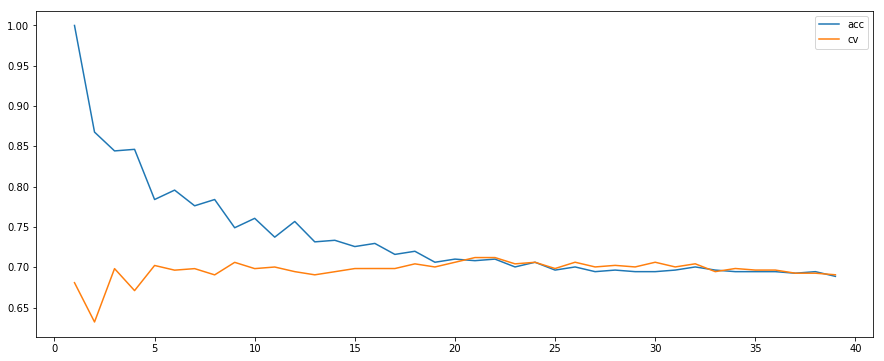

In [6]:
#Choosing the best K for our model. 
#We run the learning for values of K ranging from 1 to 40
#Plot a graph of the accuracy and decide which is the best

outcome = 'Loan_Status'

predictors = ['Gender','Married','Dependents','Education','Self_Employed',
             'Property_Area','ApplicantIncome_log','CoapplicantIncome_log','TotalIncome_log','LoanAmount_log',
             'Loan_Amount_Term','Credit_History','Property_Area']

acc = []
vald = []

for i in range(1,40):
    
    model = KNeighborsClassifier(n_neighbors=i)
    
    #Fit the model:
    model.fit(dataset[predictors],dataset[outcome])

    #Make predictions on training set:
    predictions = model.predict(dataset[predictors])

    #Print accuracy
    acc.append(metrics.accuracy_score(predictions,dataset[outcome]))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    kf.get_n_splits(dataset)
    
    validate = []
    
    for train, test in kf.split(dataset):
        # Filter training data
        train_predictors = (dataset[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = dataset[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        validate.append(model.score(dataset[predictors].iloc[test,:], dataset[outcome].iloc[test]))

    vald.append(np.mean(validate))
    
figure(figsize=(15, 6)) 
plt.plot(np.arange(1,40),acc, label="acc")
plt.plot(np.arange(1,40),vald, label="cv")
plt.legend()
plt.savefig('choice_of_K.jpg')

In [47]:
'''FEATURE SELECTION'''

'FEATURE SELECTION'

The attribute with the maximum accuracy is  Credit_History


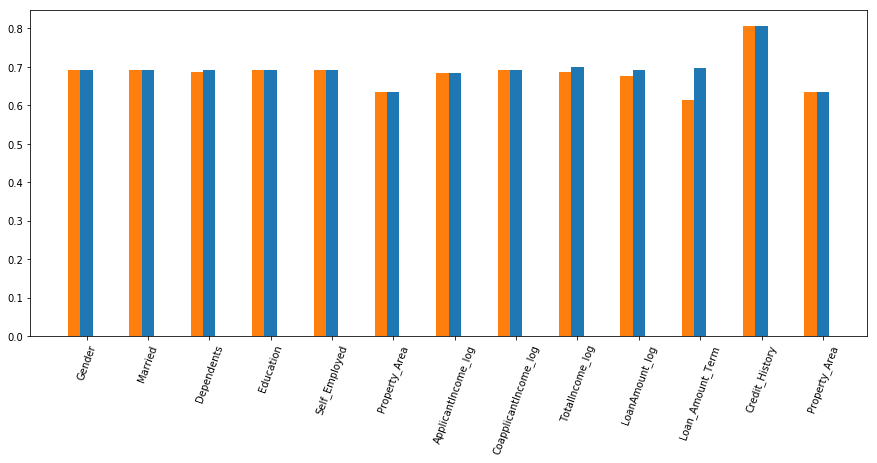

In [9]:
#The Loan Status is the variable we want to predict
outcome = 'Loan_Status'

model = KNeighborsClassifier(n_neighbors=21)

variables = ['Gender','Married','Dependents','Education','Self_Employed',
             'Property_Area','ApplicantIncome_log','CoapplicantIncome_log','TotalIncome_log','LoanAmount_log',
             'Loan_Amount_Term','Credit_History','Property_Area']

accuracy_train = []
cross_validation_score = []

for var in variables:
    
    predictors = [var]
    
    #Fit the model:
    model.fit(dataset[predictors],dataset[outcome])

    #Make predictions on training set:
    predictions = model.predict(dataset[predictors])

    #Print accuracy    
    accuracy_train.append(1-mean_squared_error(dataset[outcome], predictions))
    
    #Perform k-fold cross-validation with 5 folds

    kf = KFold(n_splits=5)
    kf.get_n_splits(dataset)
    
    error = []
    CV = []
    for train, test in kf.split(dataset):
        # Filter training data
        train_predictors = (dataset[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = dataset[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        
        #Record error from each cross-validation run
        y_pred = (model.predict(dataset[predictors].iloc[test,:]))

        error.append(mean_squared_error(dataset[outcome].iloc[test], y_pred))
        
        CV.append(1-np.mean(error))
    
    cross_validation_score.append(1-np.mean(error))
    
figure(figsize=(15, 6))    
plt.bar(np.arange(len(accuracy_train)), accuracy_train, width=0.2)
plt.bar(np.arange(len(cross_validation_score))-0.2, cross_validation_score, width=0.2)
plt.xticks(np.arange(len(variables)),variables,rotation=70)

plt.savefig('accuracy_knn_1.jpg')

feature = variables[np.argmax(accuracy_train)]
print("The attribute with the maximum accuracy is ",feature)


The attribute with the maximum accuracy is  Gender


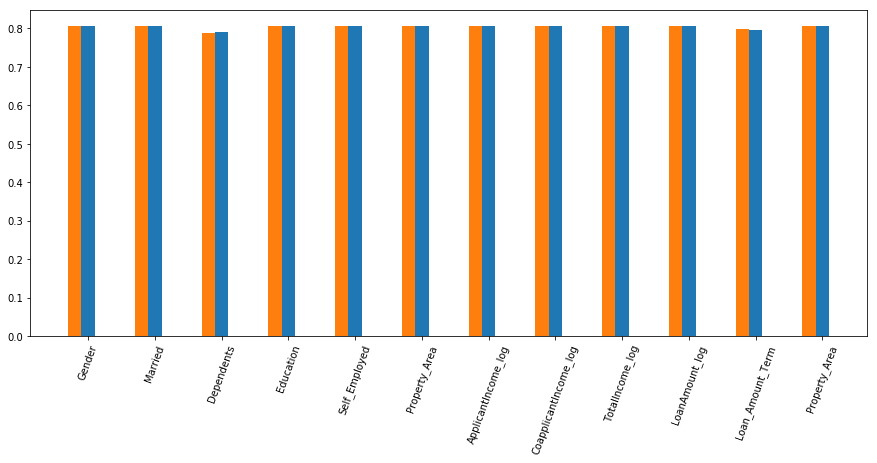

In [8]:
variables = ['Gender','Married','Dependents','Education','Self_Employed',
             'Property_Area','ApplicantIncome_log','CoapplicantIncome_log','TotalIncome_log','LoanAmount_log',
             'Loan_Amount_Term','Property_Area']

accuracy_train = []
cross_validation_score = []

for var in variables:
    
    predictors = [feature,var]
    
    #Fit the model:
    model.fit(dataset[predictors],dataset[outcome])

    #Make predictions on training set:
    predictions = model.predict(dataset[predictors])

    #Print accuracy
    accuracy_train.append(1-mean_squared_error(dataset[outcome], predictions))
    
    #Perform k-fold cross-validation with 5 folds

    kf = KFold(n_splits=5)
    kf.get_n_splits(dataset)
    
    error = []
    CV = []
    for train, test in kf.split(dataset):
        # Filter training data
        train_predictors = (dataset[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = dataset[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        
        #Record error from each cross-validation run
        y_pred = (model.predict(dataset[predictors].iloc[test,:]))

        error.append(mean_squared_error(dataset[outcome].iloc[test], y_pred))
        
        CV.append(1-np.mean(error))
    
    cross_validation_score.append(1-np.mean(error))
    
figure(figsize=(15, 6))    
plt.bar(np.arange(len(accuracy_train)), accuracy_train, width=0.2)
plt.bar(np.arange(len(cross_validation_score))-0.2, cross_validation_score, width=0.2)
plt.xticks(np.arange(len(variables)),variables,rotation=70)

plt.savefig('accuracy_knn_2.jpg')

feature = variables[np.argmax(accuracy_train)]
print("The attribute with the maximum accuracy is ",feature)


In [29]:
'''TEST DATA'''

'TEST DATA'

In [30]:
#Importing the training dataset
dataset = pd.read_csv('Dataset_Test.csv')

The Accuracy of the Test data is: 0.8073929961089494


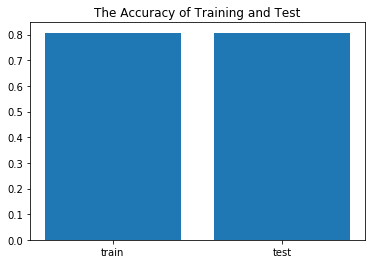

In [10]:
predictors = ["Credit_History"]
    
#Fit the model:
model.fit(dataset[predictors],dataset[outcome])

#Make predictions on training set:
predictions = model.predict(dataset[predictors])

accuracy_test = (1-mean_squared_error(dataset[outcome], predictions))

print("The Accuracy of the Test data is:",accuracy_test)


accuracy = [max(accuracy_train), accuracy_test]
data = ('train','test')


plt.bar(np.arange(len(accuracy)), accuracy)
plt.title('The Accuracy of Training and Test')
plt.xticks(np.arange(len(accuracy)),data)
plt.savefig('accuracy_knn.jpg')
plt.show()